# MNIST Classification

Classify handwritten digits from the famous MNIST dataset generated with the library MLDatasets, using NNJulia.

### Imports

In [1]:
# Import libraries
using MLDatasets
using Plots
#using Images

# NNJulia
include("../src/NNJulia.jl")
using .NNJulia

### Load dataset

In [2]:
####
# if this cell throws an error, copy these lines in
# julia REPL to download the data a first time, it will work here right after
####
# load full training set
train_x, train_y = MNIST.traindata();

# load full test set
test_x,  test_y  = MNIST.testdata();

In [3]:
# one-hot encoding of the labels
train_y_hot = to_one_hot(train_y)
test_y_hot = to_one_hot(test_y);

### Create the model 

In [4]:
model = Sequential(
        Flatten(),
        Dense(784, 16, relu),
        Dense(16, 16, relu),
        Dense(16, 10, softmax),
    )

Sequential with : 4 layer


Flatten layer.
Dense: 784 --> 16, Activation = relu
Dense: 16 --> 16, Activation = relu
Dense: 16 --> 10, Activation = softmax


### Train the model

Initialise the parameters used for the training phase :

In [5]:
# Initialise the optimiser, the loss function and the metrics used to compute accuracy
opt = GradientDescent(0.05)
loss = BinaryCrossentropy() # FIXME: Does not work with categorical crossentropy yet
metrics = CategoricalAccuracy()

# Pass it to the TrainParameters struct that will be used during training
trainParams = TrainParameters(opt, loss, metrics)

# Training specifications
batchsize = 64
nbEpochs = 25;

Load the train data into a dataloader that will split the data into shuffled batches :

In [6]:
trainData = DataLoader(train_x, train_y_hot, batchsize,true);

Train the model :

In [7]:
# The prints does not work during training in the notebook. (use the .jl version to see the lines printed during trianing )
history = train!(model, trainParams, trainData, nbEpochs,true)

Epoch 1 : accuracy = 0.3220282515991471, loss = 367.17567761166003
Epoch 2 : accuracy = 0.4718483475479744, loss = 229.17189437583642
Epoch 3 : accuracy = 0.5460087953091685, loss = 198.88271089109344
Epoch 4 : accuracy = 0.5963985874200426, loss = 177.72167751225166
Epoch 5 : accuracy = 0.6322461353944563, loss = 162.03076805790425
Epoch 6 : accuracy = 0.6644123134328358, loss = 149.6135287121151
Epoch 7 : accuracy = 0.6901652452025586, loss = 139.2886734555956
Epoch 8 : accuracy = 0.7130197228144989, loss = 130.56169377672103
Epoch 9 : accuracy = 0.7337586620469083, loss = 123.04209068526811
Epoch 10 : accuracy = 0.7513326226012793, loss = 116.54509188443923
Epoch 11 : accuracy = 0.7650253198294243, loss = 110.96141204758867
Epoch 12 : accuracy = 0.7770855543710021, loss = 106.2920356342362
Epoch 13 : accuracy = 0.7881463219616205, loss = 102.17050504548487
Epoch 14 : accuracy = 0.7965085287846482, loss = 98.52731900015544
Epoch 15 : accuracy = 0.8042543976545842, loss = 95.308224463

Dict{String, Vector{Float64}} with 2 entries:
  "accuracy" => [0.322028, 0.471848, 0.546009, 0.596399, 0.632246, 0.664412, 0.…
  "loss"     => [367.176, 229.172, 198.883, 177.722, 162.031, 149.614, 139.289,…

### Plot accuracy and loss

Plot the evolution of the accuracy and the loss during the training phase:

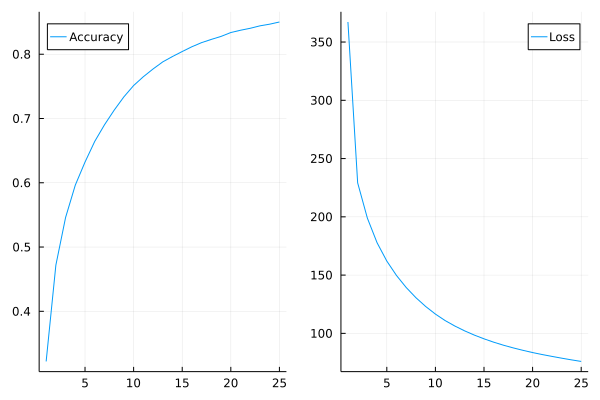

In [8]:
p1 = plot(history["accuracy"],label="Accuracy",legend=:topleft)
p2 = plot(history["loss"],label="Loss")
plot(p1,p2,layout=2)

### Evaluate the model

In [9]:
acc = evaluate(model,metrics,test_x,test_y_hot)
println("accuracy on test data = " * string(acc*100) * "%")

accuracy on test data = 85.67%


Predict a random example from the test set :

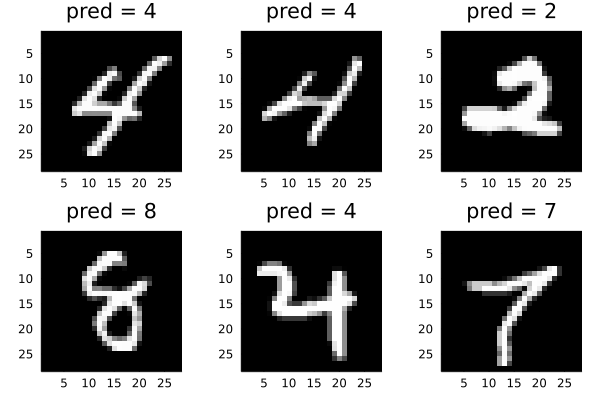

In [21]:
plots = []
for i in 1:6
    r = rand(1:10000)
    img = (Gray.(permutedims(test_x[:,:,r])))
    preds = model(reshape(test_x[:,:,r],:,1));
    predicted_label = argmax(preds.data)[1]-1
    push!(plots,plot(img,title="pred = " * string(predicted_label)))
end

plot(plots...,layout=6)